# Examen de cinturón AML – Opción C


## Descripción del examen:

En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

## Dataset:

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones



# 1. Exploración y preprocesamiento de datos:

## Carga y explora el dataset:
* Identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
train = pd.read_csv('./data/train_a.csv')
test = pd.read_csv('./data/test_a.csv')

train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [11]:
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [8]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## Asegúrate de manejar cualquier valor nulo y normalizando las lecturas sensoriales

In [5]:
print("Valores faltantes:", train.isnull().sum())
print("Valores faltantes:", test.isnull().sum())

Valores faltantes: tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
Valores faltantes: tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [6]:
# Ver columnas con valores nulos en train
print(train.isnull().sum()[train.isnull().sum() > 0])

# Ver columnas con valores nulos en test
print(test.isnull().sum()[test.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [16]:
# Separar target para escalar mas adecuadamente
X_train = train.drop(columns=["Activity"])
y_train = train["Activity"]

# Separar características y objetivo en test
X_test = test.drop(columns=["Activity"])
y_test = test["Activity"]

# Codificar la columna objetivo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Análisis no supervisado:

## PCA:

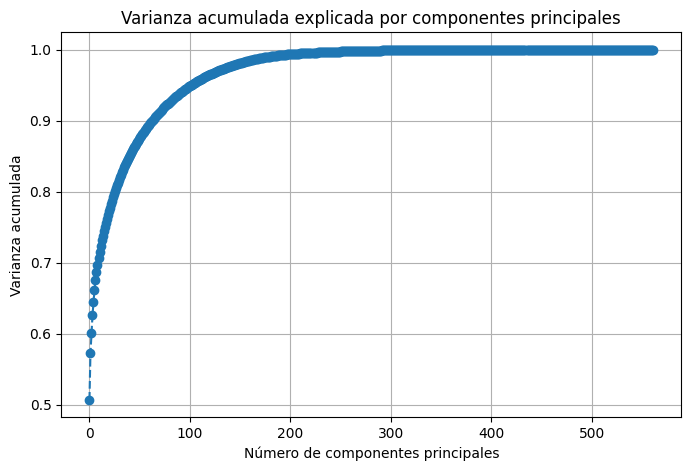

Número óptimo de componentes: 64


In [21]:
# Buscamos numero optimo de componentes
# Instanciar PCA
pca = PCA()

# Ajustar PCA a los datos de entrenamiento escalados
pca.fit(X_train_scaled)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)


# Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

# Seleccionar el número óptimo de componentes (90% de varianza)
n_components_optimal = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Número óptimo de componentes: {n_components_optimal}")

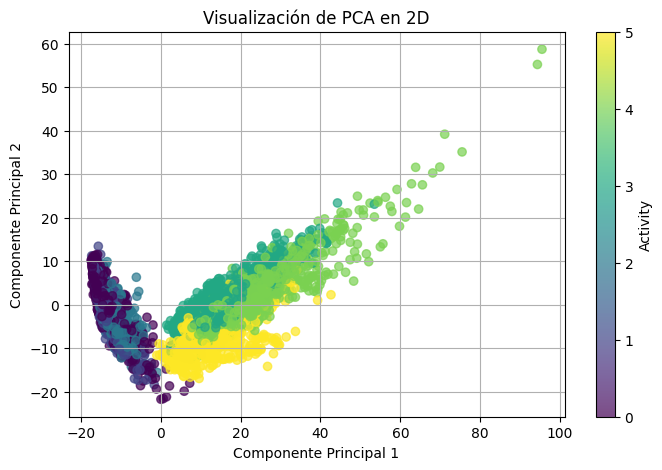

In [22]:
# Instanciar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=n_components_optimal)

# Transformar los datos
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

# Visualizar los datos en el espacio reducido
plt.figure(figsize=(8, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(label="Activity")
plt.title("Visualización de PCA en 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()

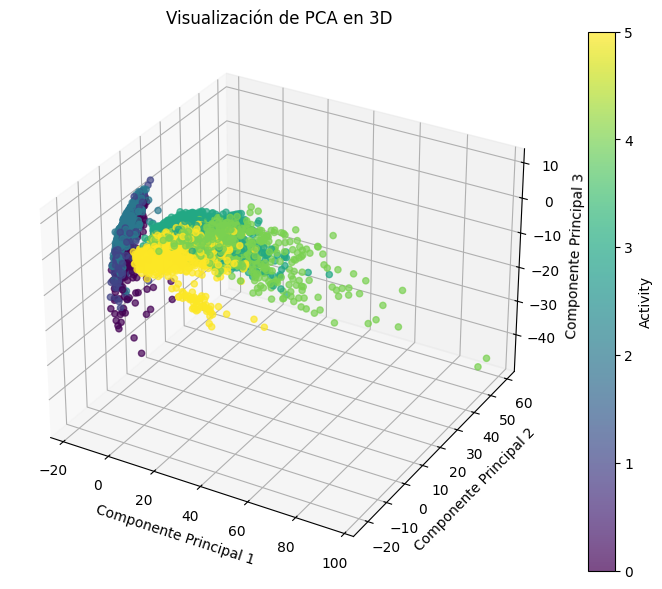

### Interpretacion de los graficos:

* Para mejor visualizacion de usaron graficos 2D y 3D
* Se obtuvo el numero optimo de componentes para explicar el 90% de la variabilidad en los datos
* Con ello se puede observar perfectamente las clases diferenciadas con distintas tonalidades de colores
* Se puede comprobar visualmente que PCA obtuvo buenos resultados

# 3. Modelado con MLP:
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

In [28]:
# Verificar distribución de actividades en ambos conjuntos
print("Distribución en train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en test:")
print(y_test.value_counts(normalize=True))

Distribución en train:
Activity
LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: proportion, dtype: float64

Distribución en test:
Activity
LAYING                0.182219
STANDING              0.180523
WALKING               0.168307
SITTING               0.166610
WALKING_UPSTAIRS      0.159824
WALKING_DOWNSTAIRS    0.142518
Name: proportion, dtype: float64


In [31]:
# Se considera que tiene una buena distribucion entonces se prosigue con el modelo

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train_encoded,  # Use X_train_scaled and y_train_encoded
    test_size=0.2,  # Usar 20% para validación
    stratify=y_train_encoded,  # Estratificación para balancear las clases
    random_state=42  # Fijar semilla para reproducibilidad
)

# Definir la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta
    Dropout(0.3),  # Regularización
    Dense(64, activation='relu'),  # Segunda capa oculta
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Tasa de aprendizaje
    loss='sparse_categorical_crossentropy',  # Para clasificación multi-clase
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,  # Use X_train and y_train here
    validation_data=(X_val, y_val),  # Datos de validación
    batch_size=32,  # Tamaño del batch
    epochs=50,  # Número de épocas
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6470 - loss: 0.9189 - val_accuracy: 0.9089 - val_loss: 0.2145
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9167 - loss: 0.2297 - val_accuracy: 0.9599 - val_loss: 0.1012
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1526 - val_accuracy: 0.9646 - val_loss: 0.0771
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9588 - loss: 0.1130 - val_accuracy: 0.9728 - val_loss: 0.0629
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9604 - loss: 0.1092 - val_accuracy: 0.9742 - val_loss: 0.0651
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0938 - val_accuracy: 0.9735 - val_loss: 0.0649
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.0970 - val_accuracy: 0.9776 - val_loss: 0.0570
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0702 - val_accuracy: 0.9680 - val_

In [33]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Precisión en test: {test_accuracy:.2f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9487 - loss: 0.2969
Precisión en test: 0.95


# 4. Evaluación del modelo:
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

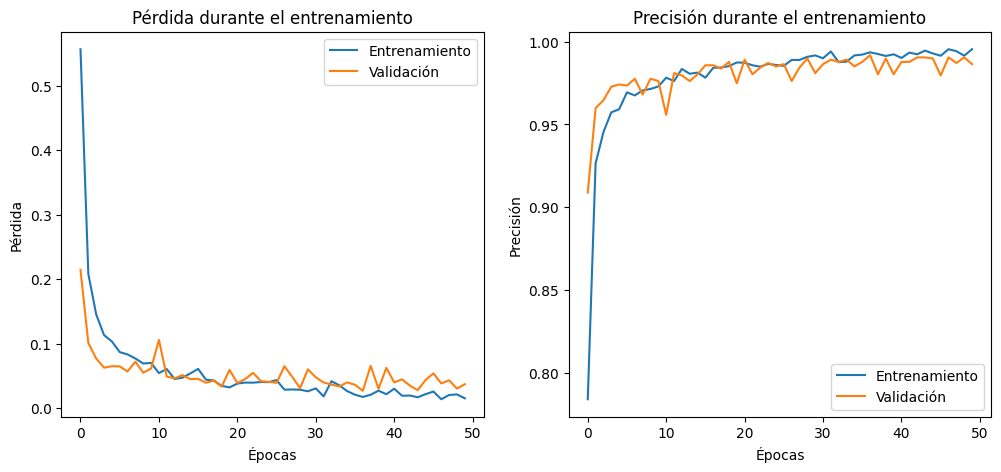

In [34]:
# Curva de pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Analisis de graficos

### Pérdida durante el entrenamiento

- Ambas curvas(entrenamiento y validacion) tienen buena convergencia ya descienden y eventualmente se estabilizan
- No hay sobreajuste, ambas curvas bajan pero no llegan a la perdida 0
- No hay subajuste porque las curvas bajan y se estabilizan alli
- Baja perdida es indicio de un buen modelo

### Precisión durante el entrenamiento
- Ambas curvas tienen buena covergencia ya que aumentan y eventualmente se estabilizan cerca de un valor alto
- No hay sobre ajuste ya que las curvas suben pero se estabilizan en un valor alto pero sin llegar a 1
- No hay subajuste porque las curvas tienden a valores altos
-Alta precision indica buen rendimiento del modelo

## Calculamos las metricas para evaluar el modelo

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9487 - loss: 0.2969
Precisión en test: 0.95

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.85      0.90       491
           2       0.88      0.97      0.92       532
           3       0.97      0.99      0.98       496
           4       0.99      0.91      0.95       420
           5       0.93      0.98      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



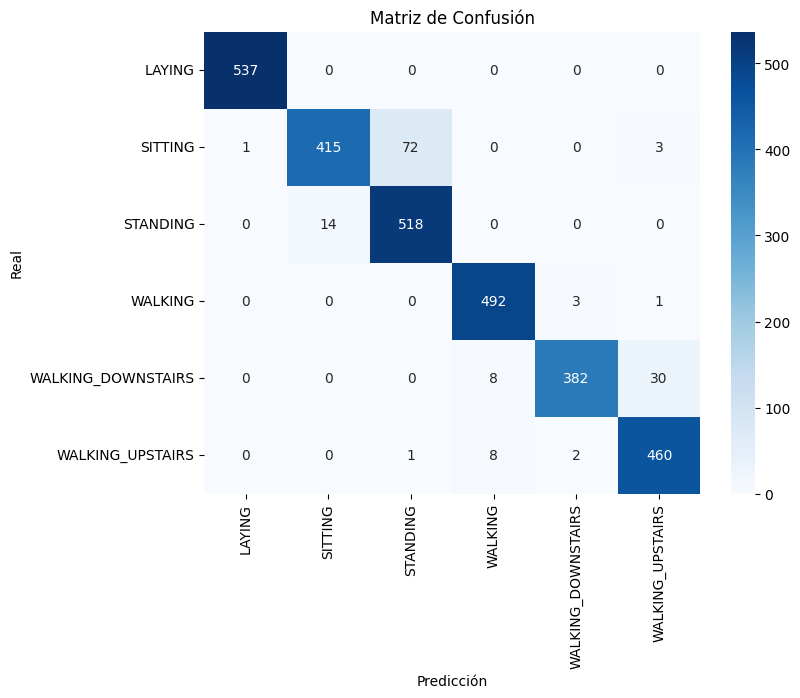

In [37]:
# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)  # Obtener la clase predicha

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Precisión en test: {test_accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_encoded, y_pred_classes))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## Analisis de metricas

### Precision (accuracy)
* La precision mide la exactitud de las predicciones positivas del modelo
* En un rango de 88% hasta 100% para las clases
* Una clase obtuvo un puntaje perfecto en la prediccion lo cual es indicio de sobreajuste, pero otra alternativa podria ser que la clase LAYING sea mas facil de predecir ya que las mediciones cuando uno esta acostado sin hacer nada es muy diferente a cuando realiza cualquier otra actividad
* Una precision general de 95% indica un rendimiento sobresaliente del modelo

### Recall
* Con un rango de 100(98 descartando LAYING), a 90 indica que el modelo tiene una exelente capacidad para detectar casos positivos

### F1-score
* Dado un buen rendimiento de la precision y el recall el f1 score tambien indica lo mismo al ser una metrica que nos da una media armonica de ambas

### Matriz de confusion
* En ella podemos ver la cantidad de valores predichos correctamente y la distribucion de los errores de prediccion, incluso podemos ver donde cayeron esos errores
* Podemos observar como en las variables de bajando y subiendo escaleras, los errores estan mas relacionados entre ellas y lo mismo ocurre cuando las personas estan paradas o sentandose, en esos casos se puede decir que las mediciones confunden mas al modelo.

### Precision (accuracy)
* La precision mide la exactitud de las predicciones positivas del modelo
* En un rango de 88% hasta 100% para las clases
* Una clase obtuvo un puntaje perfecto en la prediccion lo cual es indicio de sobreajuste, pero otra alternativa podria ser que la clase LAYING sea mas facil de predecir ya que las mediciones cuando uno esta acostado sin hacer nada es muy diferente a cuando realiza cualquier otra actividad
* Una precision general de 95% indica un rendimiento sobresaliente del modelo

### Recall
* Con un rango de 100(98 descartando LAYING), a 90 indica que el modelo tiene una exelente capacidad para detectar casos positivos

### F1-score
* Dado un buen rendimiento de la precision y el recall el f1 score tambien indica lo mismo al ser una metrica que nos da una media armonica de ambas

### Matriz de confusion
* En ella podemos ver la cantidad de valores predichos correctamente y la distribucion de los errores de prediccion, incluso podemos ver donde cayeron esos errores
* Podemos observar como en las variables de bajando y subiendo escaleras, los errores estan mas relacionados entre ellas y lo mismo ocurre cuando las personas estan paradas o sentandose, en esos casos se puede decir que las mediciones confunden mas al modelo.

### Precision (accuracy)
* La precision mide la exactitud de las predicciones positivas del modelo
* En un rango de 88% hasta 100% para las clases
* Una clase obtuvo un puntaje perfecto en la prediccion lo cual es indicio de sobreajuste, pero otra alternativa podria ser que la clase LAYING sea mas facil de predecir ya que las mediciones cuando uno esta acostado sin hacer nada es muy diferente a cuando realiza cualquier otra actividad
* Una precision general de 95% indica un rendimiento sobresaliente del modelo

### Recall
* Con un rango de 100(98 descartando LAYING), a 90 indica que el modelo tiene una exelente capacidad para detectar casos positivos

### F1-score
* Dado un buen rendimiento de la precision y el recall el f1 score tambien indica lo mismo al ser una metrica que nos da una media armonica de ambas

### Matriz de confusion
* En ella podemos ver la cantidad de valores predichos correctamente y la distribucion de los errores de prediccion, incluso podemos ver donde cayeron esos errores
* Podemos observar como en las variables de bajando y subiendo escaleras, los errores estan mas relacionados entre ellas y lo mismo ocurre cuando las personas estan paradas o sentandose, en esos casos se puede decir que las mediciones confunden mas al modelo.

# 5. Discusión y análisis:

## Reflexiona sobre los resultados del análisis no supervisado.

* En el analisis no supervisado se de opto por PCA el cual reduce las compontentes hasta la minima cantidad que explique cierto porcentaje de la variabilidad de datos, en este caso el 90%
* Graficamente se pudo observar como se diferenciaban los clusters correspondientes a cada clase del target
* De aproximadamente 560 columnas correspondientes a datos sensoriales pasamos a solo 64 componentes
* Con el PCA hacemos un tradeoff de reduccion extrema de componentes por interpretabilidad de las mismas, es decir, no podemos saber con certeza que mediciones aportan mas o menos a la clasificaion de las actividades fisicas



## Discute el rendimiento del MLP y cómo podría mejorarse

* El rendimiento del MLP fue muy bueno con el 95% de precision
* Se utilizo dropout como tecnica de regularizacion
* Se considera que este modelo es adecuado para predecir actividades fisicas basado en datos sensoriales ya que capta perfectamente las relaciones complejas entre ellas
* Definitivamente se puede mejorar especialmente utilizando tecnicas de mejoramiento de hiperparametros y ajustando mas los parametros de las tecnicas de regularizacion para evitar sobreajuste